In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tol_colors as tc

def plotLoss(prob_name, poly_deg):
    # methods
    methods = ["cave", "cave+", "caveh", "spo+", "pfyl"]
    labels = ["CaVE-Exact", "CaVE+", "CaVE-Hybrid", "SPO+", "PFYL"]
    # color map
    cset =  tc.tol_cset("muted")
    # set fig
    fig = plt.figure(figsize=(16,8))
    # relaxation
    for i, method in enumerate(methods):
        # get path
        res_dir = "./res/{}/n1000deg{}".format(prob_name, poly_deg)
        res_path = res_dir + "/{}_loss_0.csv".format(method)
        # load loss
        loss = np.genfromtxt(res_path, delimiter=",", skip_header=1)
        # smooth
        #loss = movingAverage(loss, 5)
        # normalize
        loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
        # plot
        plt.plot(loss, color=cset[i], alpha=0.8, lw=2, label=labels[i])
    # font size
    plt.xlabel("Iterations", fontsize=38)
    plt.ylabel("Normalized Loss", fontsize=38)
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.legend(fontsize=32)
    # title
    plt.title("Loss Curve for the {}".format(prob_name.upper()), fontsize=40)
    # save
    plt.tight_layout()
    plt.savefig(res_dir+"/loss.pdf")

In [2]:
def movingAverage(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

## SP5 

### Poly-Degree 4

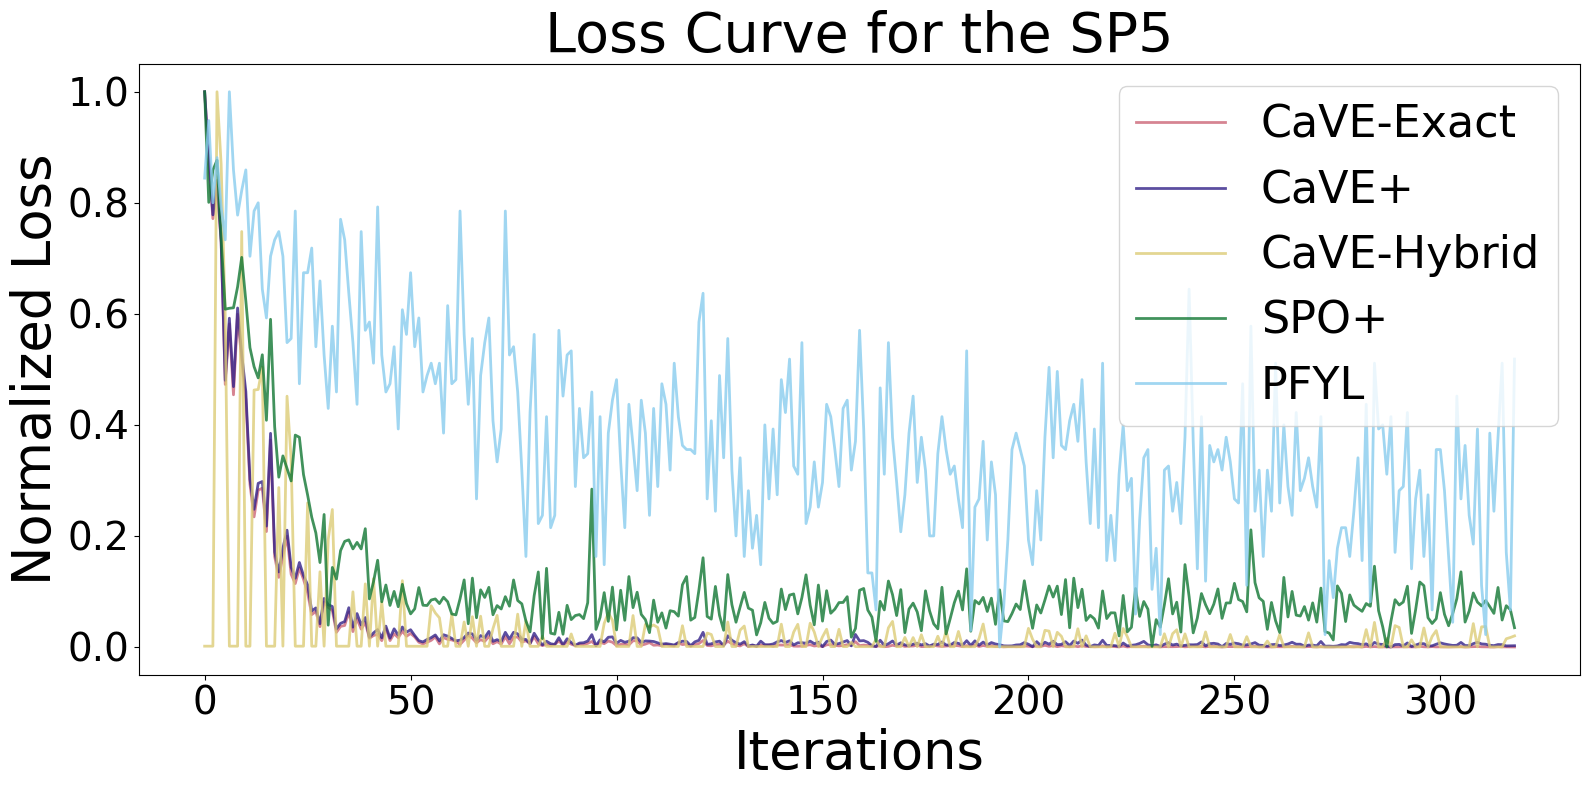

In [3]:
plotLoss(prob_name="sp5", poly_deg=4)

## TSP20

### Poly-Degree 4

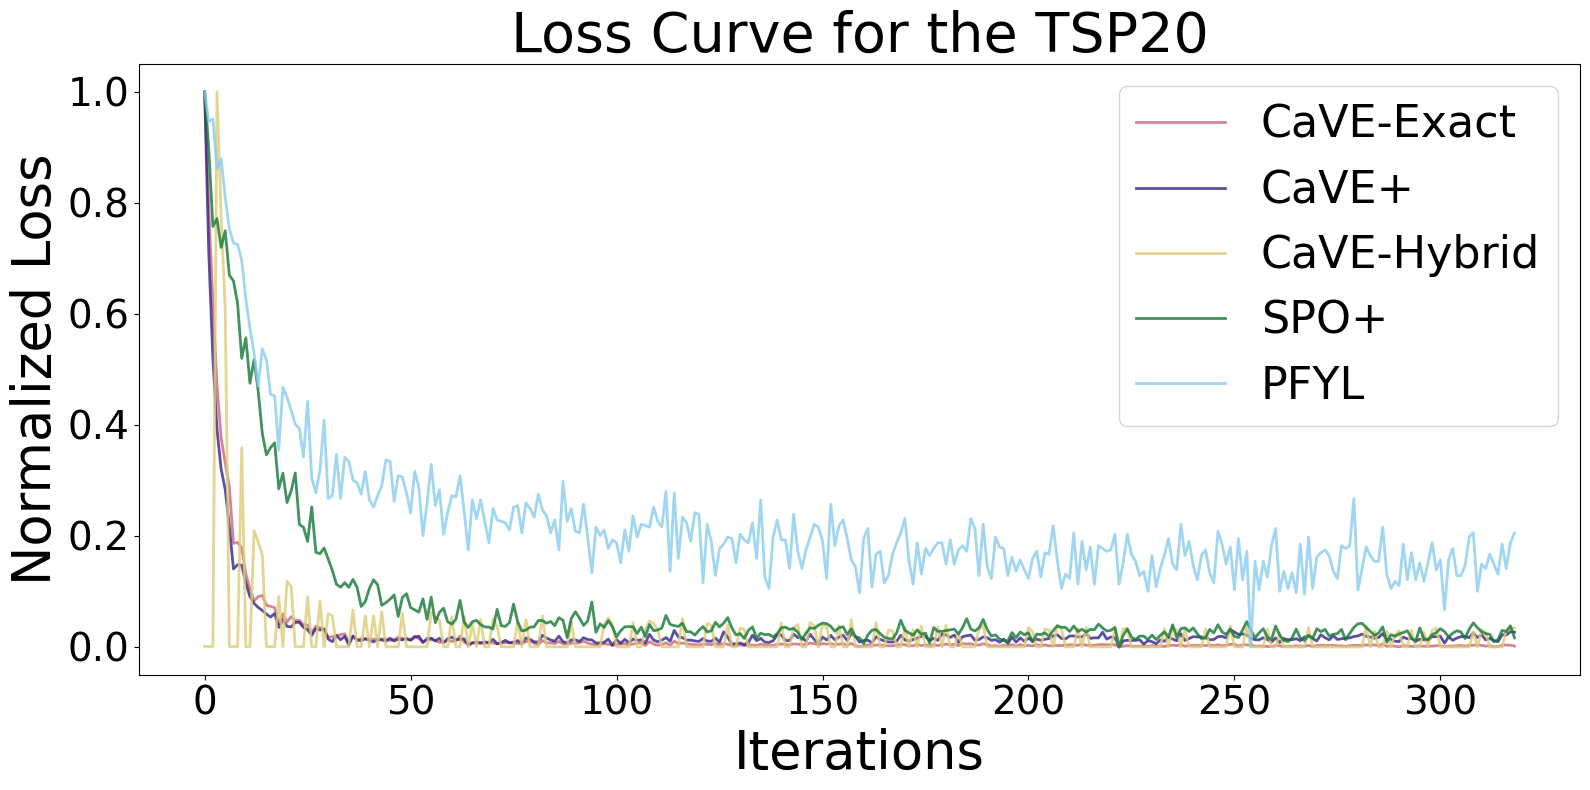

In [4]:
plotLoss(prob_name="tsp20", poly_deg=4)

## TSP50

### Poly-Degree 4

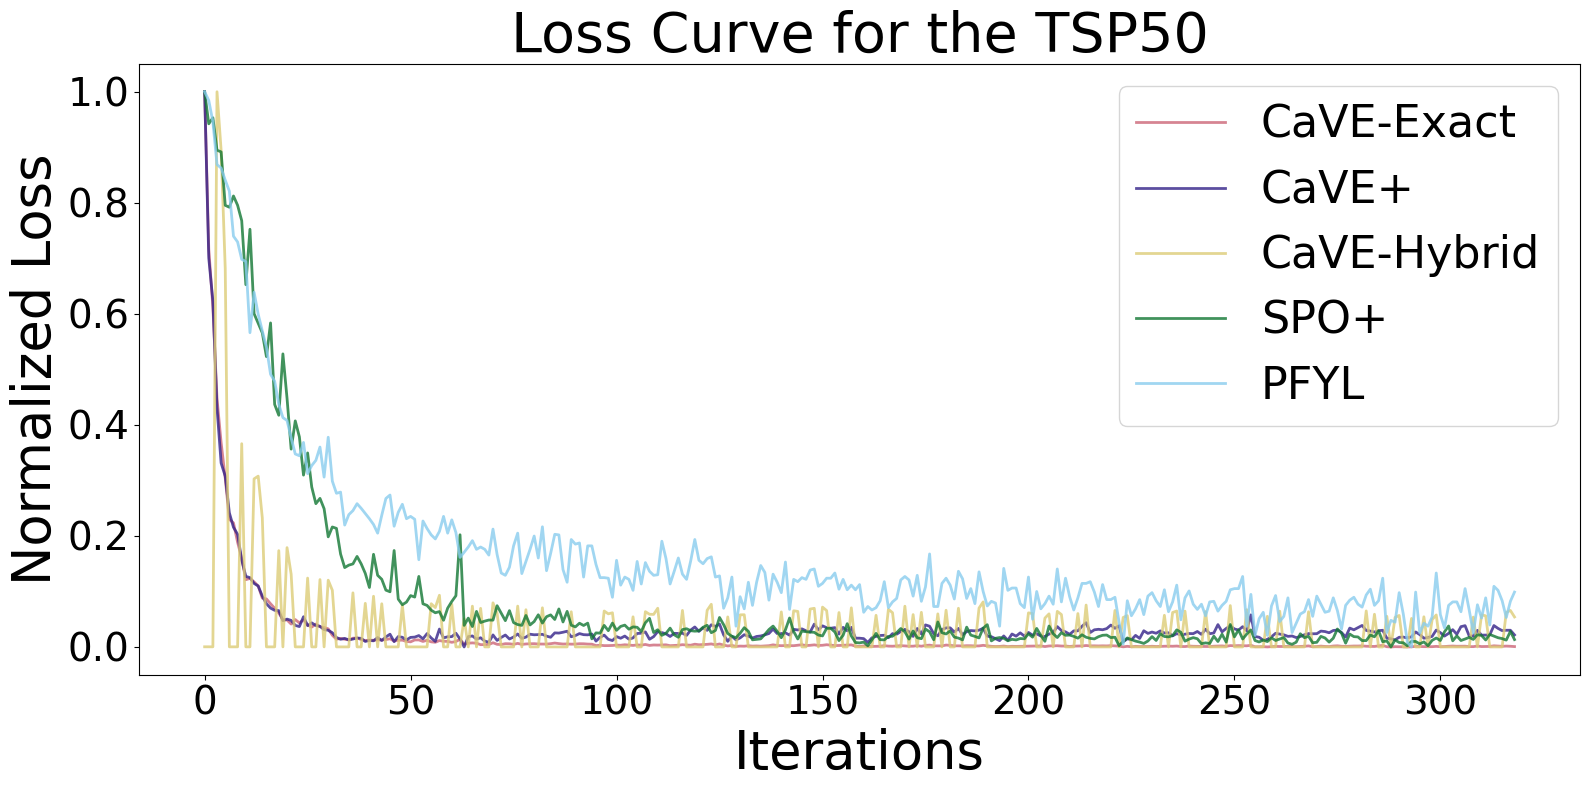

In [5]:
plotLoss(prob_name="tsp50", poly_deg=4)

## VRP20 

### Poly-Degree 4

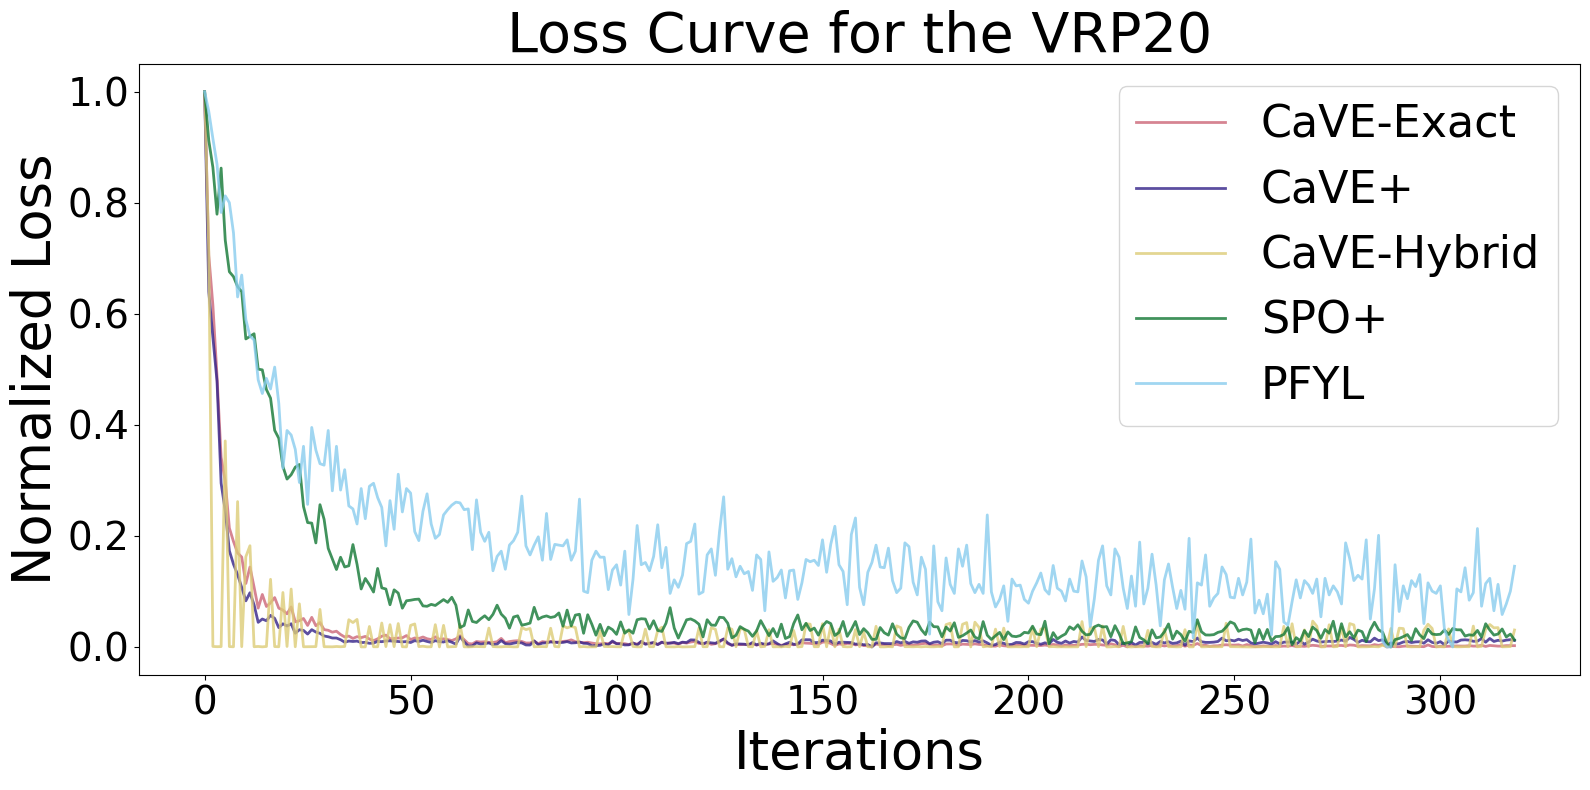

In [6]:
plotLoss(prob_name="vrp20", poly_deg=4)